In [1]:
#================================= Imnporting the dataset==================================#
import pandas as pd

dataset = pd.read_csv("QueryResults.csv", header = 0)
print(dataset)

                        m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]


In [2]:
#================checking the columns and the nature of the columns===========================#
    # Reanaming the columns 

dataset.rename(columns ={"m": "Date", 
                         "TagName": "Tag", 
                         "Unnamed: 2": "POSTS"}, 
                         inplace=True)

print(dataset)
    # Checking the type of columns 
print(dataset.dtypes)

    # Need to chaneg the date to datetime module 
dataset["Date"] =  pd.to_datetime(dataset["Date"])

                     Date         Tag  POSTS
0     2008-07-01 00:00:00          c#      3
1     2008-08-01 00:00:00    assembly      8
2     2008-08-01 00:00:00  javascript    162
3     2008-08-01 00:00:00           c     85
4     2008-08-01 00:00:00      python    124
...                   ...         ...    ...
1986  2020-07-01 00:00:00           r   5694
1987  2020-07-01 00:00:00          go    743
1988  2020-07-01 00:00:00        ruby    775
1989  2020-07-01 00:00:00        perl    182
1990  2020-07-01 00:00:00       swift   3607

[1991 rows x 3 columns]
Date     object
Tag      object
POSTS     int64
dtype: object


In [3]:
#==============================Explore the dataset==========================================#
    # Top 5 and Last 5
dataset.head(5)
dataset.tail(5)

    #Shape of the datset
dataset.shape
dataset.columns

    # Count the number of entries in each column
print(dataset.count())
        # Counts the number of non 0 values. 

    # Get the number of N/A Values 
dataset.isna().sum()
    # Point: No need to do listwise or partial deletions 




Date     1991
Tag      1991
POSTS    1991
dtype: int64


Date     0
Tag      0
POSTS    0
dtype: int64

In [20]:
#=========================================Challenge 1=========================================#
#Challenge 1: The TAG is the name of the programming language. 
# So for example in July 2008, there were 3 posts tagged with the language C#. 
# Given that the TAG serves as our category column. 
# Can you figure out how to count the number of posts per language? 
# Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

#Also, some languages are older like C and other languages are newer (like Swift). 
##The dataset starts in July 2008, so some languages will not have any posts for every month. 
###Can you count how many months of posts exist for each programming language?


    # Posts per langauge 
number_posts_per_language = dataset.groupby("Tag")["POSTS"].sum()

    # Sorting the values by highest post. 
number_posts_per_language.sort_values( ascending = False)
print(number_posts_per_language)

    # Number of days posted 
months_posted = dataset.groupby("Tag").count()
months_posted.sort_values(by = "POSTS", ascending = False )
print(months_posted[["POSTS"]])

Tag
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64
            POSTS
Tag              
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135


In [ ]:
#======================================Use of pivot table=====================================#
pivoted_dataset = dataset.pivot(index = "Date", columns = "Tag", values="POSTS")
print(pivoted_dataset)

    # Assessing the pivot table 
pivoted_dataset.shape
pivoted_dataset.columns
pivoted_dataset.count()

Tag         assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

Tag         javascript   perl     php   python    

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [ ]:
#=============================Filling in missing values=====================================#
    # We dont want to drop the missing values. Therefore use fillna 
pivoted_dataset.fillna("0")

    # Cecking if there are any missing vlaues 
pivoted_dataset.isna().values.any()

np.True_

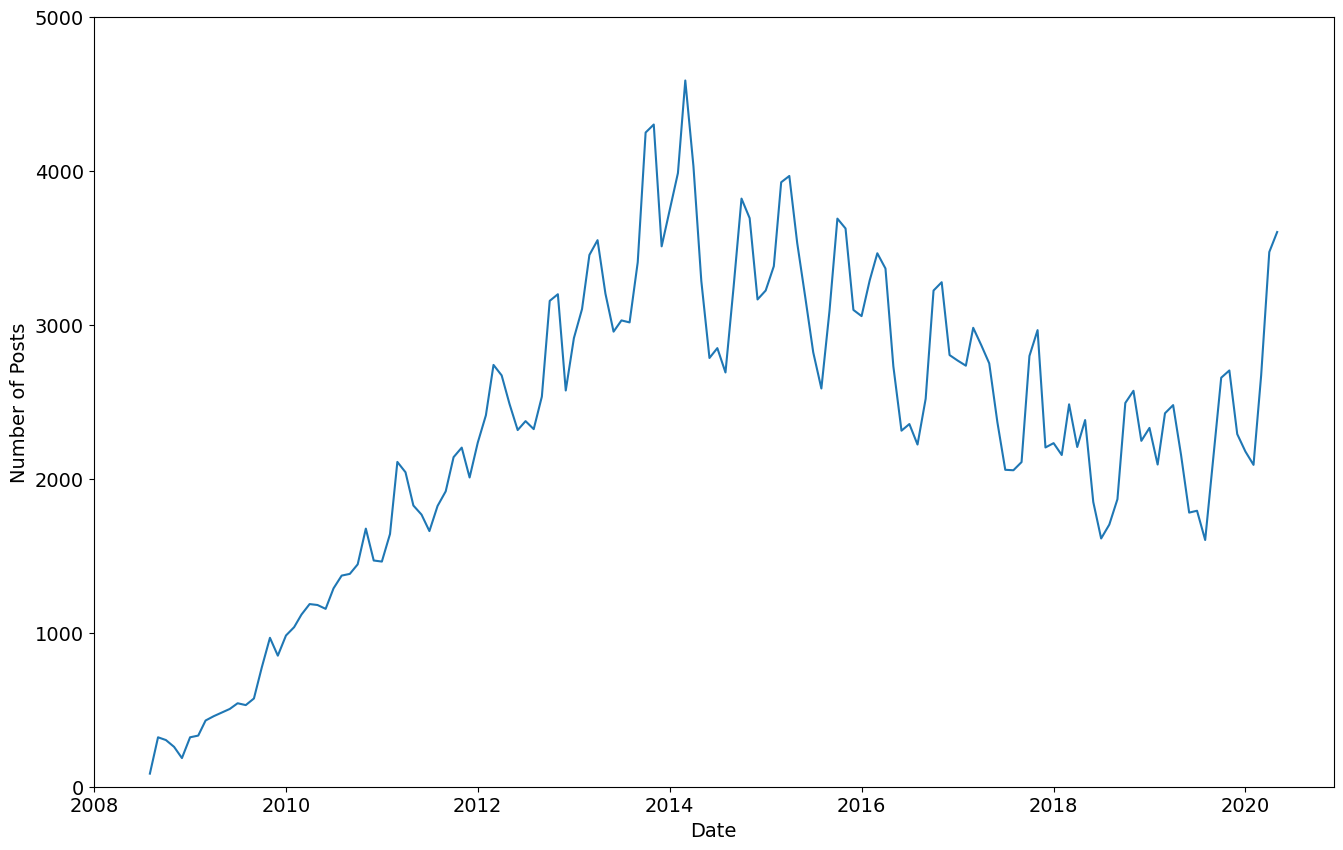

In [ ]:
#=============================Building charts in matplot lib=================================#
import matplotlib.pyplot as plt 

#Sizing of the chart 
plt.figure(figsize =(16, 10))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize= 14)
plt.ylabel("Number of Posts", fontsize= 14)
plt.ylim(0, 5000)

# Plot functions 
plt.plot(pivoted_dataset.index[:-2], pivoted_dataset["c"][:-2])

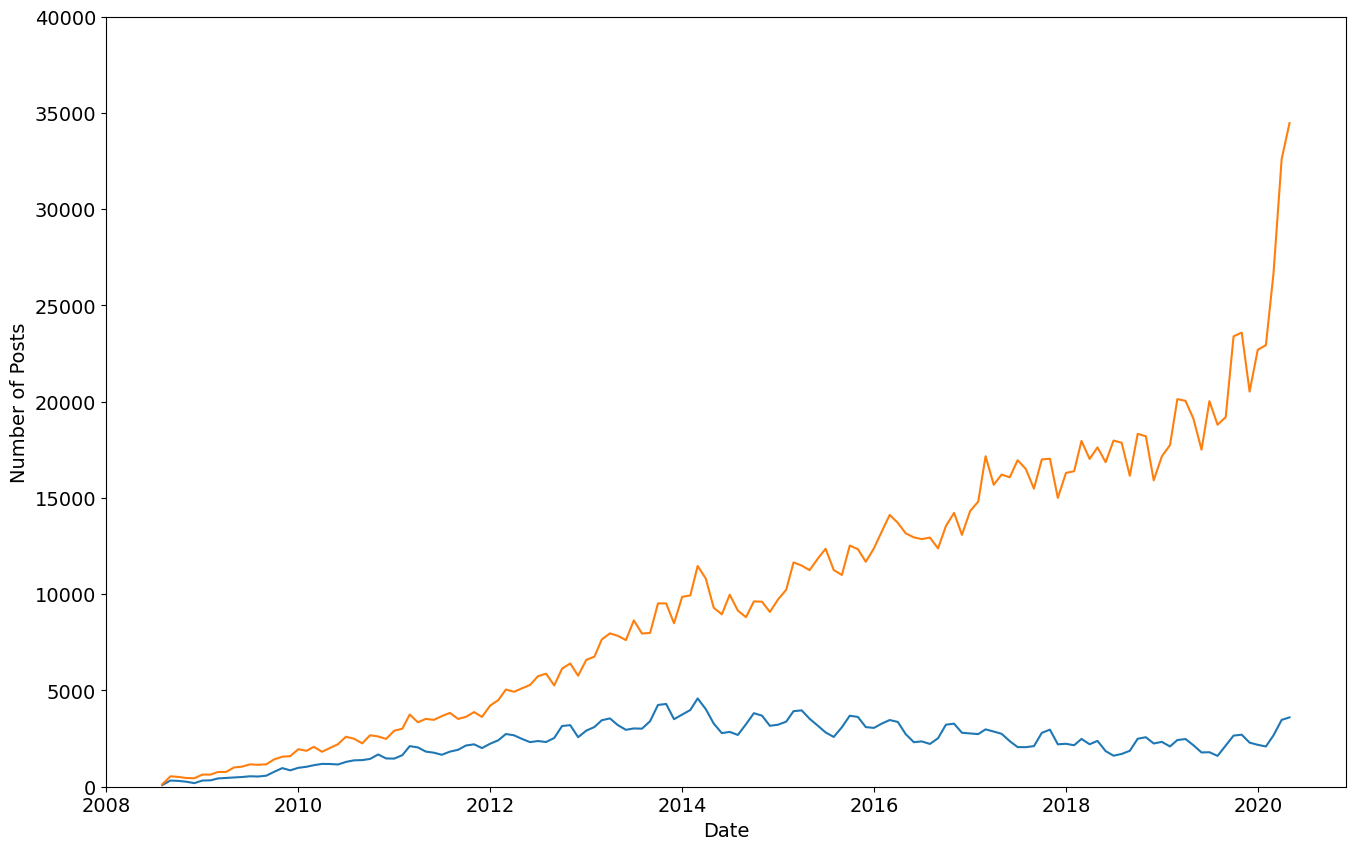

In [ ]:
#==========================================Multiple Plots=======================================#
#Sizing of the chart 
plt.figure(figsize =(16, 10))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize= 14)
plt.ylabel("Number of Posts", fontsize= 14)
plt.ylim(0, 40000)

# Plot functions 
plt.plot(pivoted_dataset.index[:-2], pivoted_dataset["c"][:-2])
plt.plot(pivoted_dataset.index[:-2], pivoted_dataset["python"][:-2])

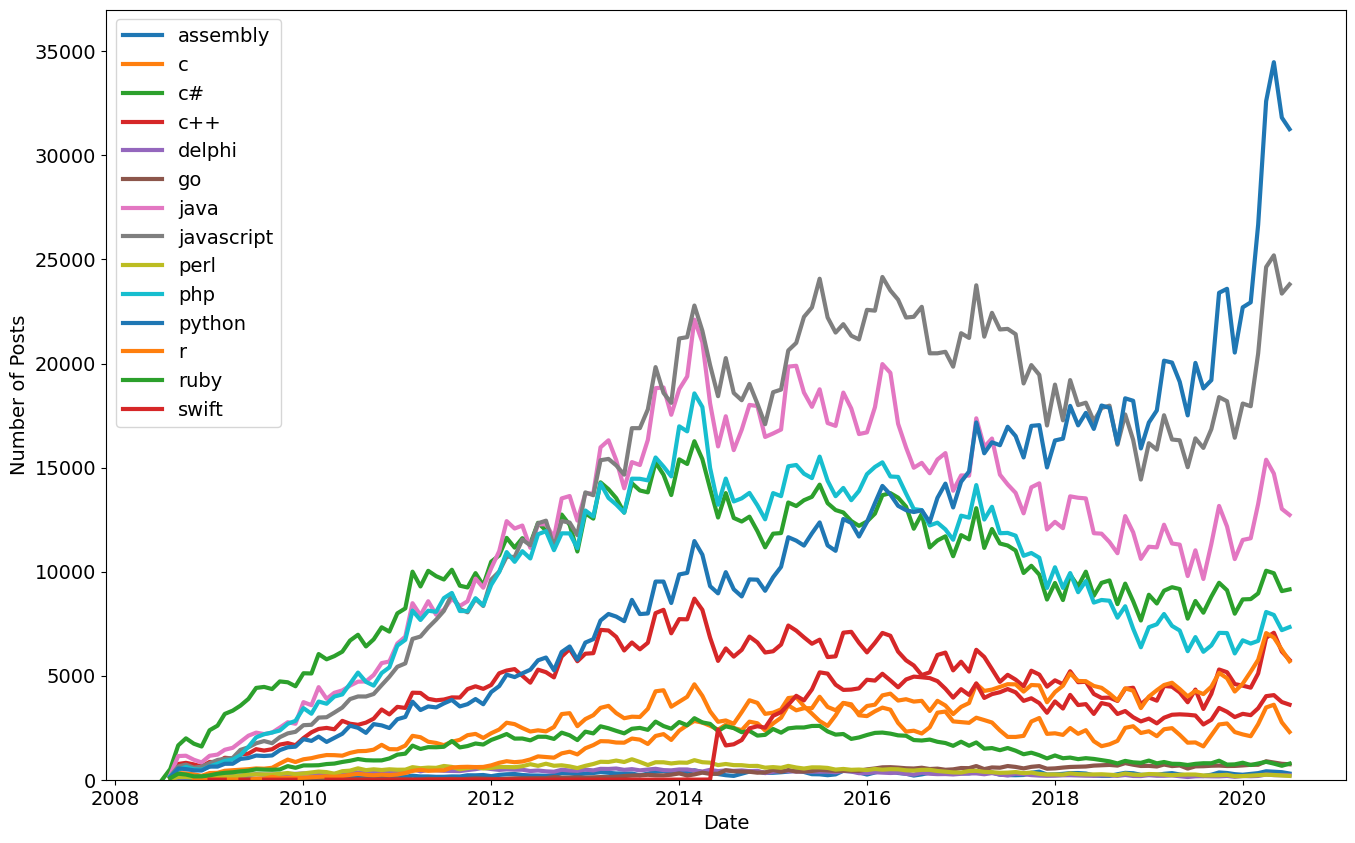

In [ ]:
#=================================Plotting the entire table=================================#
#Sizing of the chart 
plt.figure(figsize =(16, 10))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize= 14)
plt.ylabel("Number of Posts", fontsize= 14)
plt.ylim(0, 37000)

# Plots 
for columns in pivoted_dataset:
    plt.plot( pivoted_dataset.index, 
             pivoted_dataset[columns],
             linewidth=3,                                   # Thickness of the line 
             label=pivoted_dataset[columns].name)           # Assigns a name 
# Legend:
plt.legend( fontsize = 14)                                  # Displays the legend box   

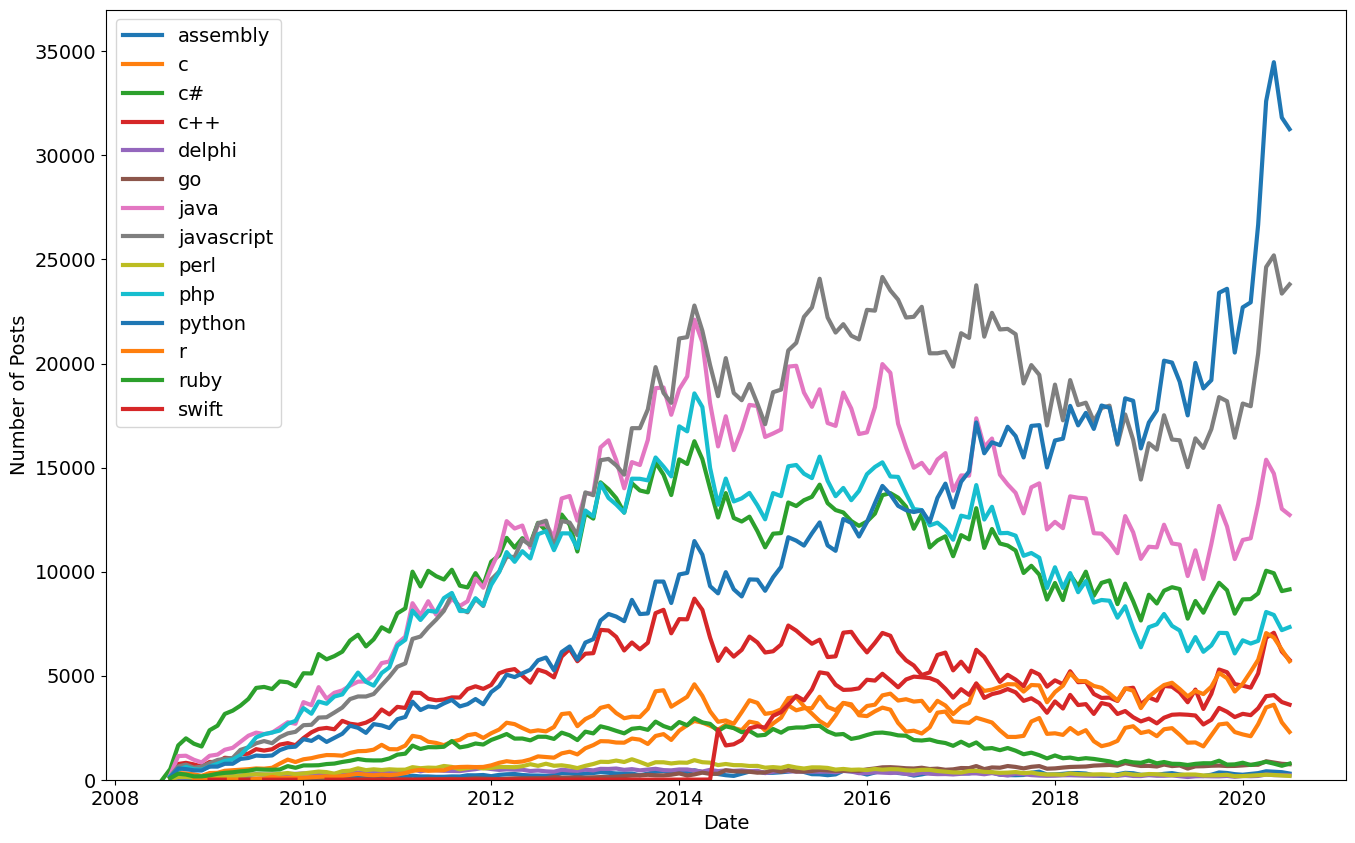

In [ ]:
#=======================Smooth out the results using the rolling mean=============================#
rolled_dataset = pivoted_dataset.rolling(window = 6).mean()


#Sizing of the chart 
plt.figure(figsize =(16, 10))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize= 14)
plt.ylabel("Number of Posts", fontsize= 14)
plt.ylim(0, 37000)

# Plots 
for columns in pivoted_dataset:
    plt.plot( pivoted_dataset.index, 
             pivoted_dataset[columns],
             linewidth=3,                                   # Thickness of the line 
             label=pivoted_dataset[columns].name)           # Assigns a name 
# Legend:
plt.legend( fontsize = 14)                                  # Displays the legend box   